In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Step 1: Load Datasets
user_details = pd.read_excel("C:\\Users\\lenovo\\Downloads\\Assignment.xlsx", sheet_name="UserDetails.csv")
cooking_sessions = pd.read_excel("C:\\Users\\lenovo\\Downloads\\Assignment.xlsx", sheet_name="CookingSessions.csv")
order_details = pd.read_excel("C:\\Users\\lenovo\\Downloads\\Assignment.xlsx", sheet_name="OrderDetails.csv")

In [4]:
# Step 2: Data Cleaning
def clean_data(df):
    """Cleans the given dataset."""
    df.drop_duplicates(inplace=True)
    df.fillna(method='ffill', inplace=True)
    return df

In [5]:
user_details = clean_data(user_details)
cooking_sessions = clean_data(cooking_sessions)
order_details = clean_data(order_details)

C:\Users\lenovo\AppData\Local\Temp\ipykernel_21860\4072522823.py:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


In [8]:
print(cooking_sessions.columns)
print(order_details.columns)
print(user_details.columns)


Index(['Session ID', 'User ID', 'Dish Name', 'Meal Type', 'Session Start',
       'Session End', 'Duration (mins)', 'Session Rating'],
      dtype='object')
Index(['Order ID', 'User ID', 'Order Date', 'Meal Type', 'Dish Name',
       'Order Status', 'Amount (USD)', 'Time of Day', 'Rating', 'Session ID'],
      dtype='object')
Index(['User ID', 'User Name', 'Age', 'Location', 'Registration Date', 'Phone',
       'Email', 'Favorite Meal', 'Total Orders'],
      dtype='object')


In [11]:
cooking_sessions.columns = cooking_sessions.columns.str.strip().str.replace(' ', '').str.lower()
order_details.columns = order_details.columns.str.strip().str.replace(' ', '').str.lower()
user_details.columns = user_details.columns.str.strip().str.replace(' ', '').str.lower()


In [18]:
# Standardize column names
cooking_sessions.columns = cooking_sessions.columns.str.strip().str.replace(' ', '').str.lower()
order_details.columns = order_details.columns.str.strip().str.replace(' ', '').str.lower()
user_details.columns = user_details.columns.str.strip().str.replace(' ', '').str.lower()

# Merge cooking_sessions and order_details on 'sessionid'
merged_data_1 = pd.merge(cooking_sessions, order_details, on="sessionid", how="inner")

# Resolve duplicate user ID columns
merged_data_1.rename(columns={"userid_x": "userid"}, inplace=True)

# Merge the result with user_details on 'userid'
merged_data = pd.merge(merged_data_1, user_details, on="userid", how="inner")

# Validate the merged data
print(merged_data.info())
print(merged_data.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   sessionid         16 non-null     object        
 1   userid            16 non-null     object        
 2   dishname_x        16 non-null     object        
 3   mealtype_x        16 non-null     object        
 4   sessionstart      16 non-null     datetime64[ns]
 5   sessionend        16 non-null     datetime64[ns]
 6   duration(mins)    16 non-null     int64         
 7   sessionrating     16 non-null     float64       
 8   orderid           16 non-null     int64         
 9   userid_y          16 non-null     object        
 10  orderdate         16 non-null     datetime64[ns]
 11  mealtype_y        16 non-null     object        
 12  dishname_y        16 non-null     object        
 13  orderstatus       16 non-null     object        
 14  amount(usd)       16 non-nul

In [35]:
print(f"Merged data shape: {merged_data.shape}")

Merged data shape: (16, 25)


In [20]:
merged_data.head()


,sessionid,userid,dishname_x,mealtype_x,sessionstart,sessionend,duration(mins),sessionrating,orderid,userid_y,...,timeofday,rating,username,age,location,registrationdate,phone,email,favoritemeal,totalorders
0,S001,U001,Spaghetti,Dinner,2024-12-01 19:00:00,2024-12-01 19:30:00,30,4.5,1001,U001,...,Night,5.0,Alice Johnson,28,New York,2023-01-15,123-456-7890,alice@email.com,Dinner,12
1,S002,U002,Caesar Salad,Lunch,2024-12-01 12:00:00,2024-12-01 12:20:00,20,4.0,1002,U002,...,Day,4.0,Bob Smith,35,Los Angeles,2023-02-20,987-654-3210,bob@email.com,Lunch,8
2,S003,U003,Grilled Chicken,Dinner,2024-12-02 19:30:00,2024-12-02 20:10:00,40,4.8,1003,U003,...,Night,4.0,Charlie Lee,42,Chicago,2023-03-10,555-123-4567,charlie@email.com,Breakfast,15
3,S004,U001,Pancakes,Breakfast,2024-12-02 07:30:00,2024-12-02 08:00:00,30,4.2,1004,U001,...,Morning,4.0,Alice Johnson,28,New York,2023-01-15,123-456-7890,alice@email.com,Dinner,12
4,S005,U004,Caesar Salad,Lunch,2024-12-03 13:00:00,2024-12-03 13:15:00,15,4.7,1005,U004,...,Day,4.0,David Brown,27,San Francisco,2023-04-05,444-333-2222,david@email.com,Dinner,10


In [21]:
# Summary statistics of the dataset
print(merged_data.describe())


                     sessionstart                     sessionend  \
count                          16                             16   
mean   2024-12-05 02:50:37.500000  2024-12-05 03:20:56.249999872   
min           2024-12-01 12:00:00            2024-12-01 12:20:00   
25%           2024-12-03 08:37:30            2024-12-03 08:58:45   
50%           2024-12-05 00:30:00            2024-12-05 00:57:30   
75%           2024-12-06 23:22:30            2024-12-07 00:00:00   
max           2024-12-08 19:30:00            2024-12-08 20:10:00   
std                           NaN                            NaN   

       duration(mins)  sessionrating      orderid            orderdate  \
count       16.000000      16.000000    16.000000                   16   
mean        30.312500       4.518750  1008.500000  2024-12-04 12:00:00   
min         10.000000       4.000000  1001.000000  2024-12-01 00:00:00   
25%         20.000000       4.300000  1004.750000  2024-12-02 18:00:00   
50%         30.00

In [22]:
# Check if there are any missing values
print(merged_data.isnull().sum())


sessionid           0
userid              0
dishname_x          0
mealtype_x          0
sessionstart        0
sessionend          0
duration(mins)      0
sessionrating       0
orderid             0
userid_y            0
orderdate           0
mealtype_y          0
dishname_y          0
orderstatus         0
amount(usd)         0
timeofday           0
rating              0
username            0
age                 0
location            0
registrationdate    0
phone               0
email               0
favoritemeal        0
totalorders         0
dtype: int64


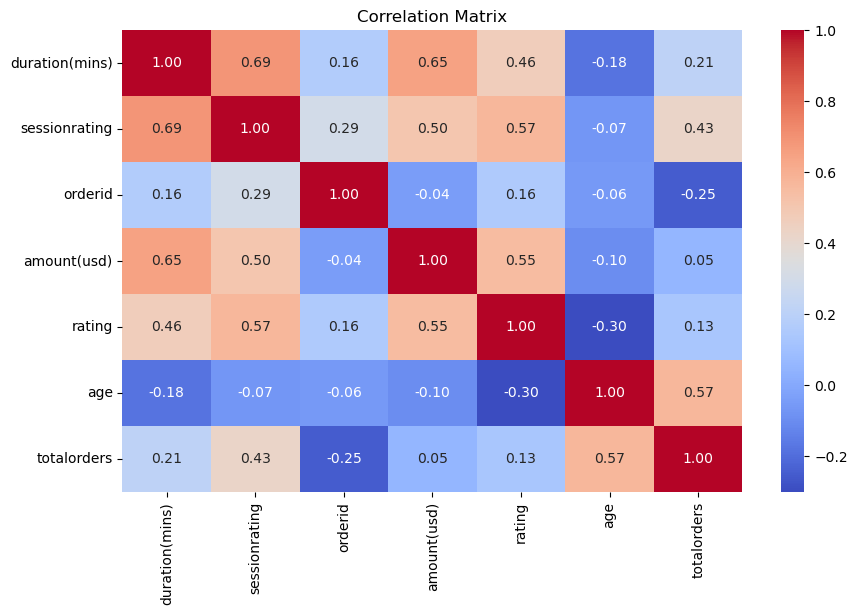

In [24]:
# Select only the numeric columns
numeric_data = merged_data.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
correlation_matrix = numeric_data.corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


In [25]:
# Popular dishes based on meal type
popular_dishes = merged_data.groupby('mealtype_x')['dishname_x'].value_counts().reset_index(name='count')
popular_dishes = popular_dishes.sort_values(['mealtype_x', 'count'], ascending=[True, False])
print(popular_dishes)


  mealtype_x       dishname_x  count
0  Breakfast         Pancakes      2
1  Breakfast          Oatmeal      1
2     Dinner  Grilled Chicken      4
3     Dinner        Spaghetti      4
4      Lunch     Caesar Salad      3
5      Lunch    Veggie Burger      2


In [26]:
# Average session rating by meal type
avg_rating_mealtype = merged_data.groupby('mealtype_x')['sessionrating'].mean().reset_index()
print(avg_rating_mealtype)


  mealtype_x  sessionrating
0  Breakfast           4.30
1     Dinner           4.70
2      Lunch           4.36


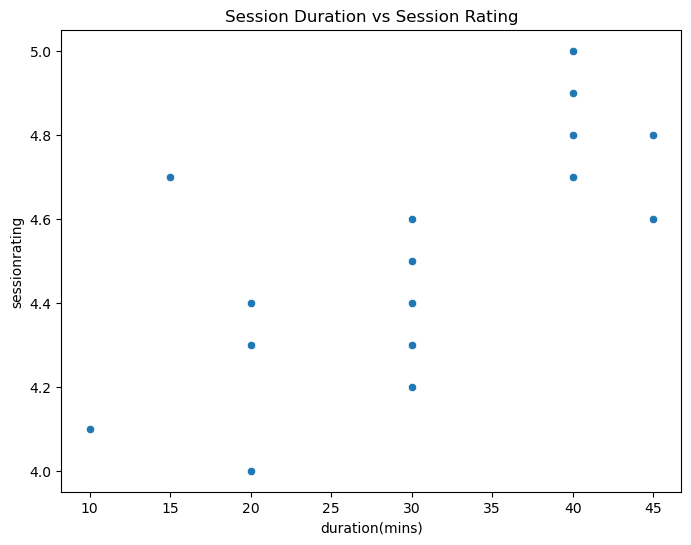

In [27]:
# Plotting session duration vs. session rating
plt.figure(figsize=(8, 6))
sns.scatterplot(x='duration(mins)', y='sessionrating', data=merged_data)
plt.title("Session Duration vs Session Rating")
plt.show()


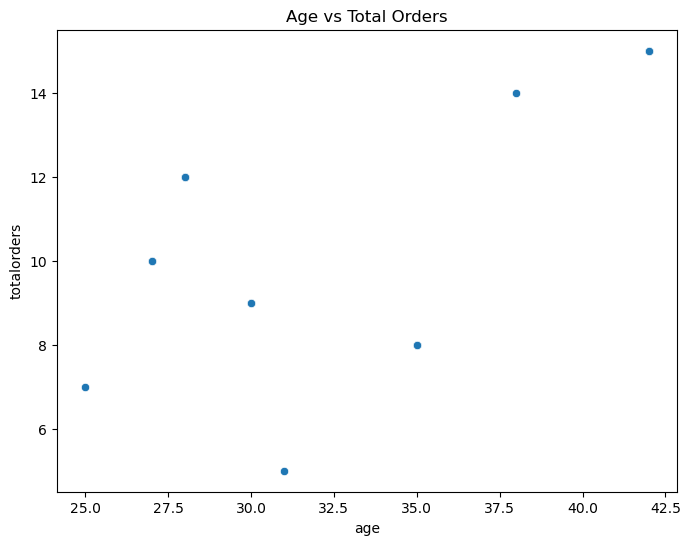

In [28]:
# Age vs Total Orders
plt.figure(figsize=(8, 6))
sns.scatterplot(x='age', y='totalorders', data=merged_data)
plt.title("Age vs Total Orders")
plt.show()


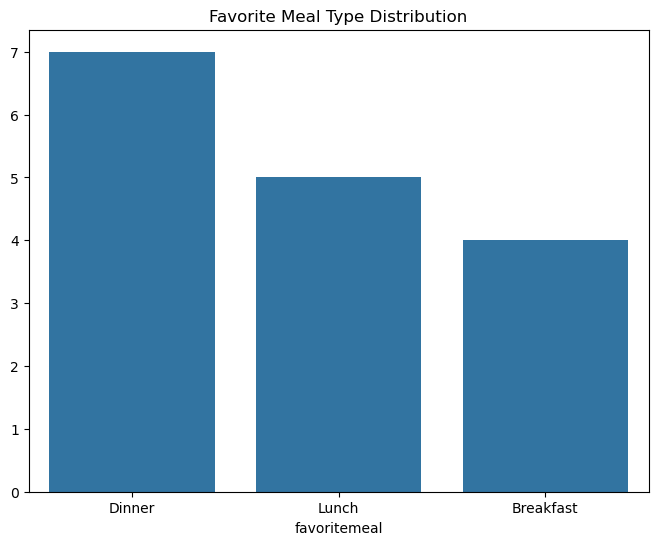

In [29]:
# User favorite meal type distribution
favorite_meals = merged_data['favoritemeal'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=favorite_meals.index, y=favorite_meals.values)
plt.title("Favorite Meal Type Distribution")
plt.show()


In [30]:
#1Visualizations

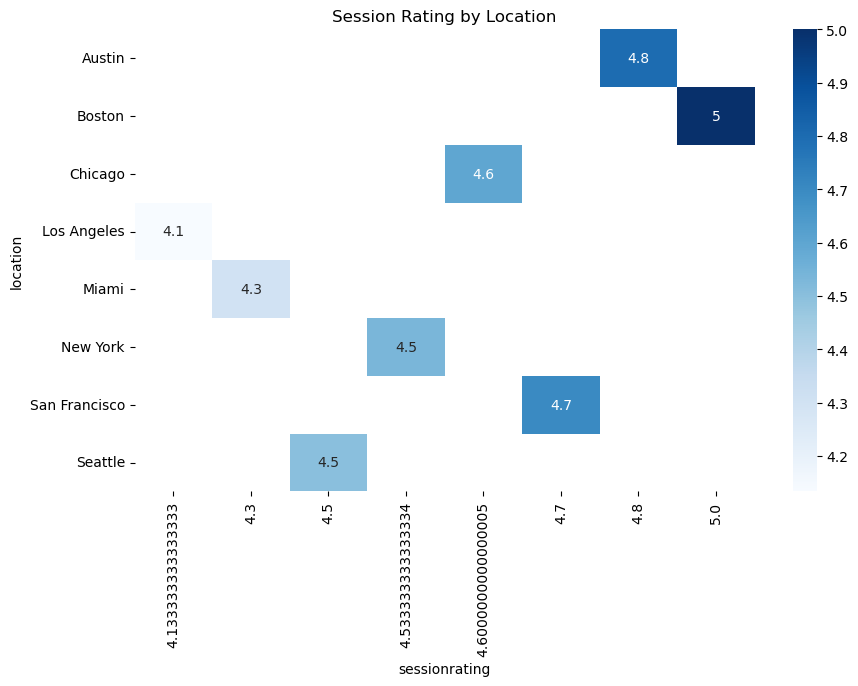

In [32]:
# Calculate average session rating by location
avg_rating_location = merged_data.groupby('location')['sessionrating'].mean().reset_index()

# Pivot the data for heatmap
pivot_data = avg_rating_location.pivot(index='location', columns='sessionrating', values='sessionrating')

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_data, annot=True, cmap='Blues')
plt.title("Session Rating by Location")
plt.show()


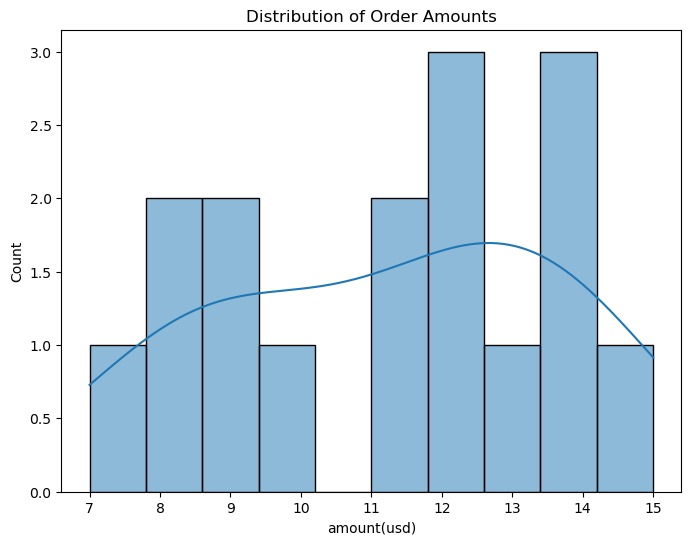

In [33]:
# Order amount distribution
plt.figure(figsize=(8, 6))
sns.histplot(merged_data['amount(usd)'], bins=10, kde=True)
plt.title("Distribution of Order Amounts")
plt.show()


In [36]:
# Save the merged data to an Excel file
merged_data.to_excel("C:\\Users\\lenovo\\Documents\\merged_data.xlsx", index=False)
print("Merged data saved as Excel.")


Merged data saved as Excel.
